### CREATING A Back Propagated Neural Network 
- STEP1 : Importing the libraries
- STEP2 : Loading the data
- STEP3 : Scaling features
- STEP4 : Splitting data into testing and training
- STEP5 : defining Model Architecture
- STEP6 : Compiling and Training the model

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

Loading the data

In [2]:
# Load data
df = pd.read_csv('KC1.csv')
data=df


In [3]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


### EXPLORATORY DATA ANALYSIS

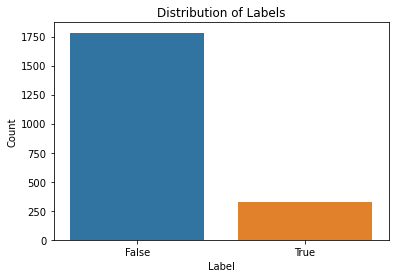

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a countplot using Seaborn
sns.countplot(data=df, x='problems')

# Set the labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Show the plot
plt.show()


<AxesSubplot:>

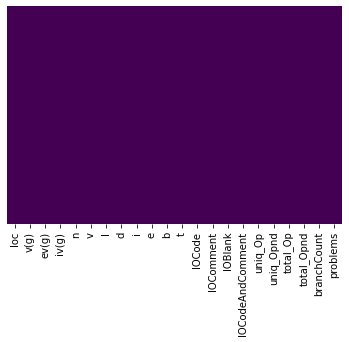

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

UNDERSTANDING POPULATION DISTRIBUTION

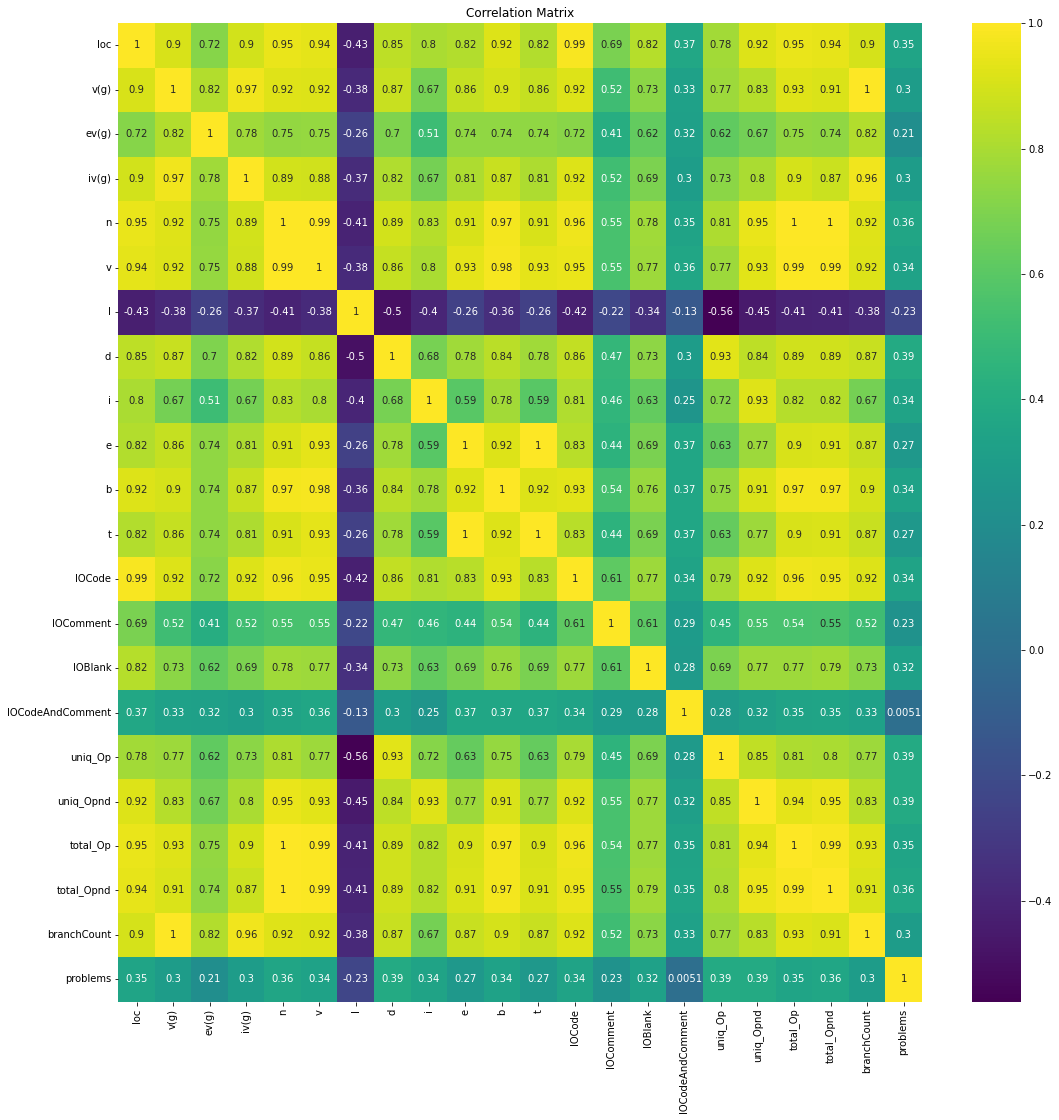

In [6]:
plt.figure(figsize=(18,18))
corr_matrix = df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

# Set the plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

<AxesSubplot:xlabel='loc', ylabel='count'>

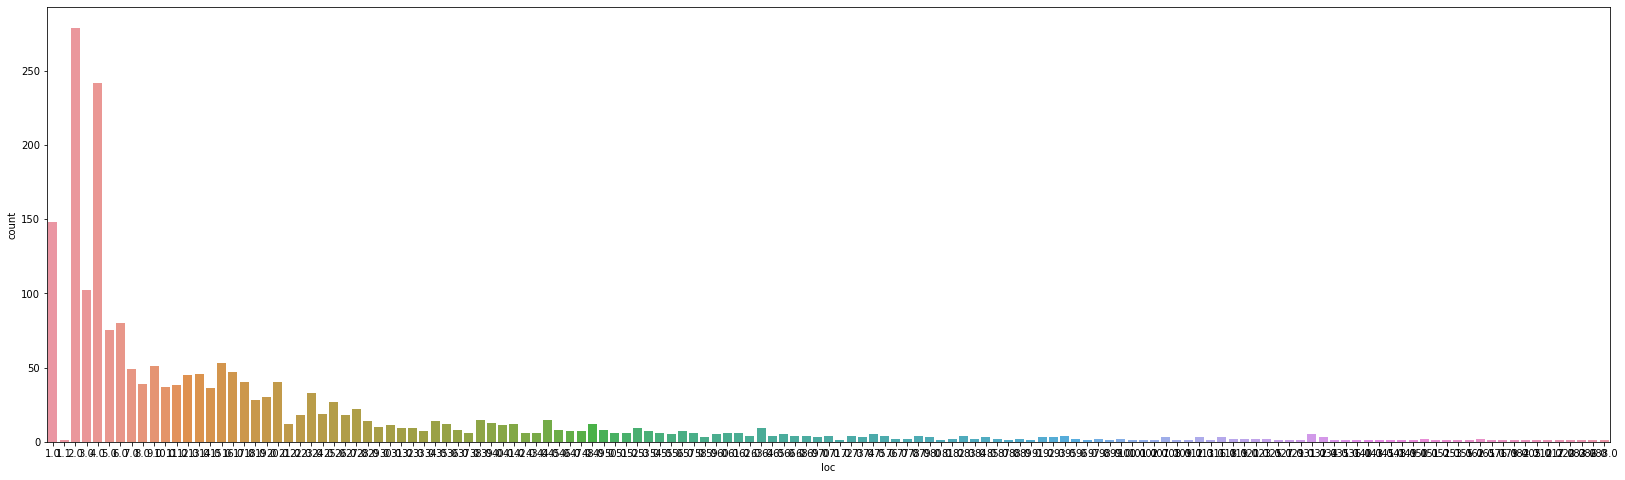

In [7]:
plt.figure(figsize=(28, 8))
sns.countplot(x='loc',data=df)

<AxesSubplot:xlabel='v(g)', ylabel='count'>

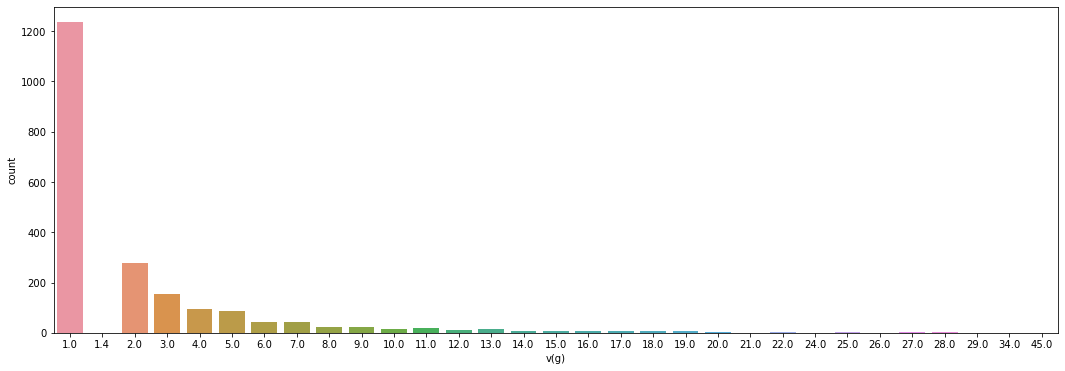

In [8]:
plt.figure(figsize=(18, 6))
sns.countplot(x='v(g)',data=df)

<AxesSubplot:xlabel='ev(g)', ylabel='count'>

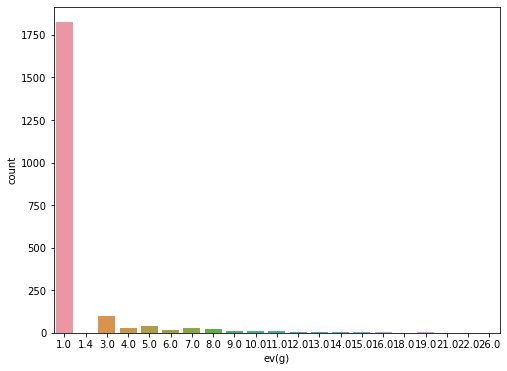

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ev(g)',data=df)

<AxesSubplot:xlabel='iv(g)', ylabel='count'>

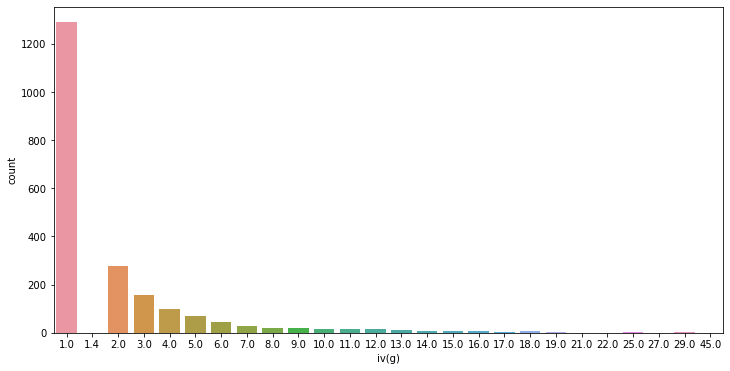

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='iv(g)',data=df)

<AxesSubplot:xlabel='n', ylabel='count'>

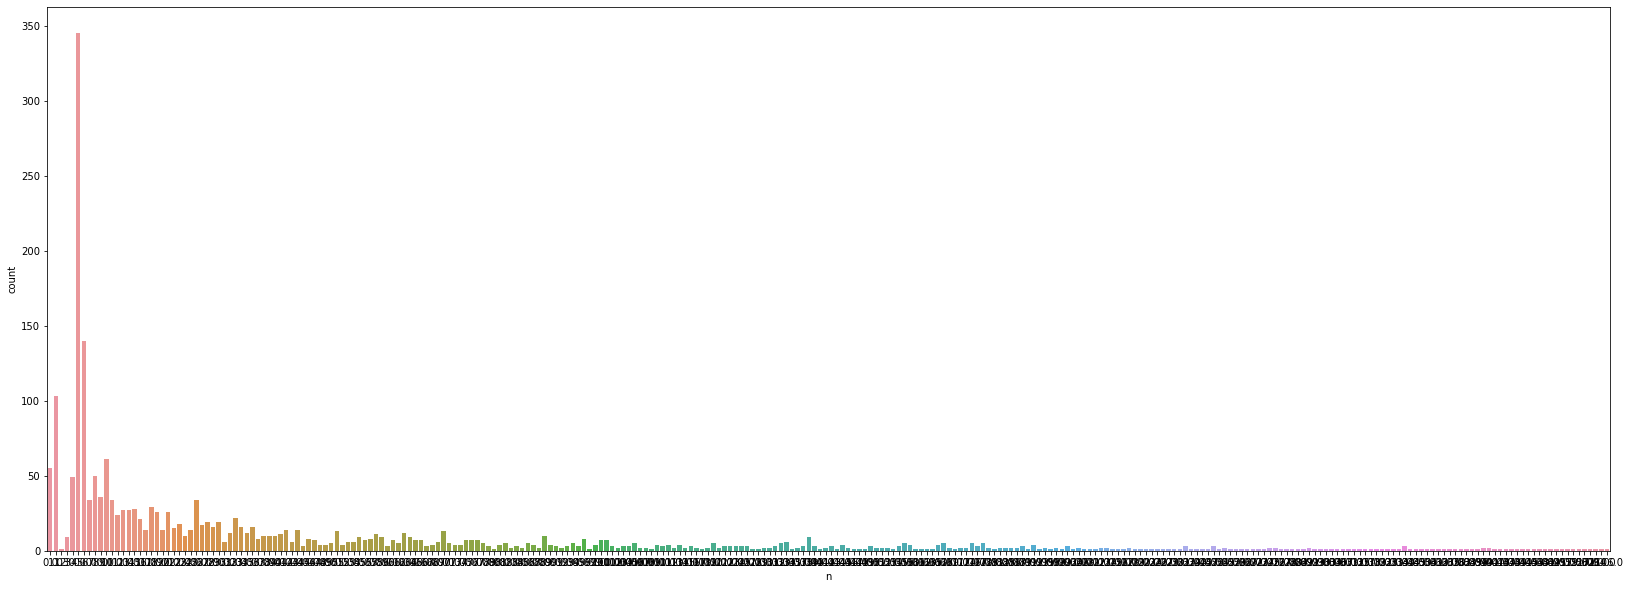

In [11]:
plt.figure(figsize=(28, 10))
sns.countplot(x='n',data=df)

<AxesSubplot:xlabel='v', ylabel='count'>

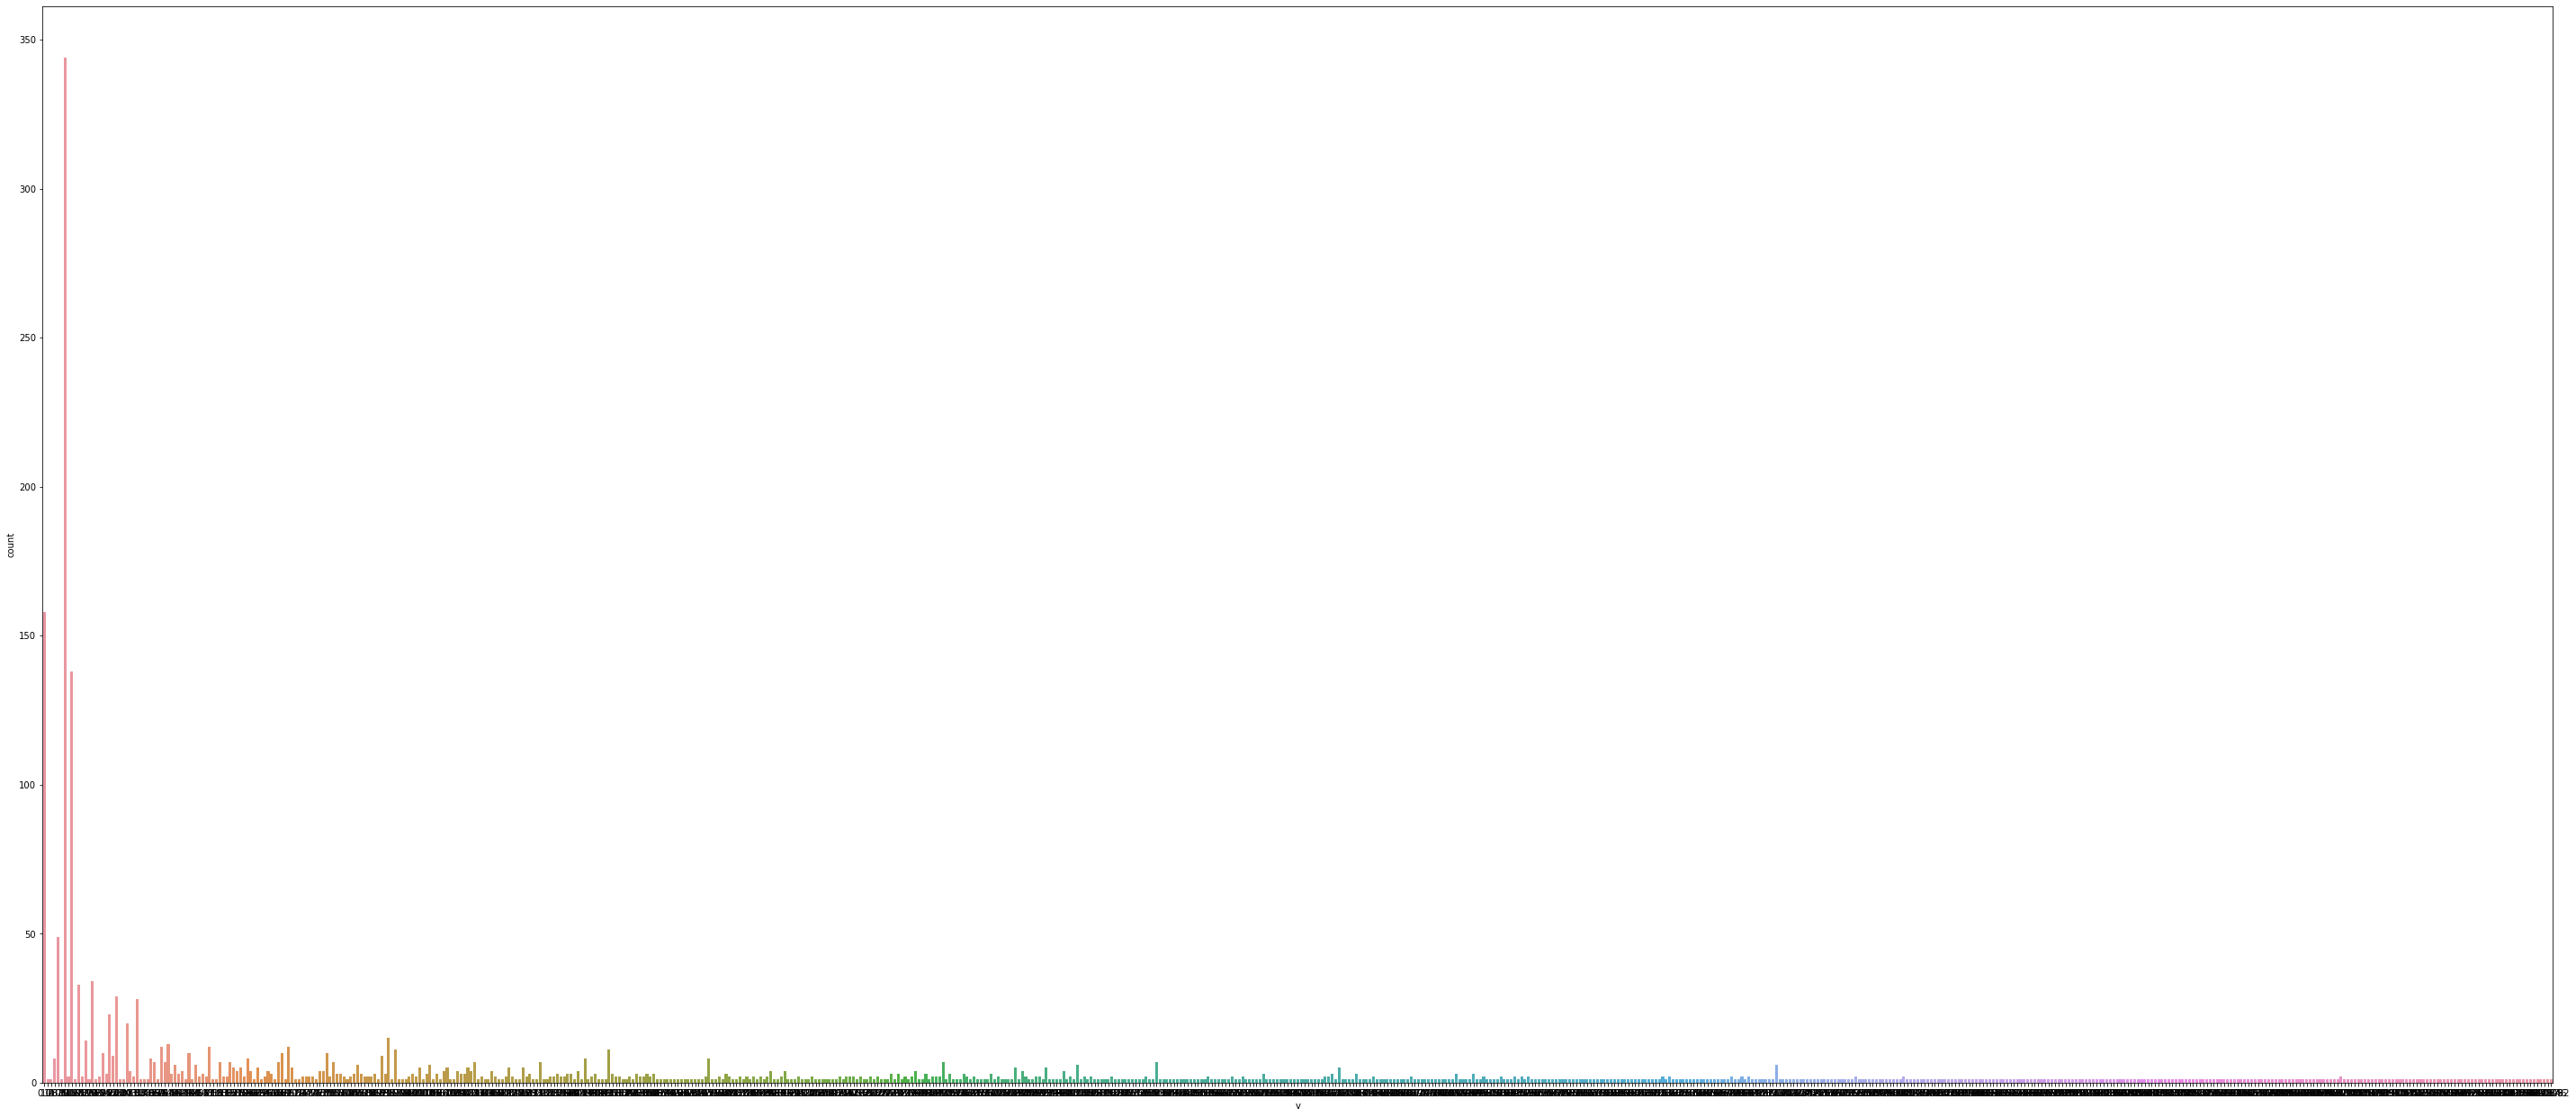

In [12]:
plt.figure(figsize=(50, 22))
sns.countplot(x='v',data=df)

<AxesSubplot:xlabel='l', ylabel='count'>

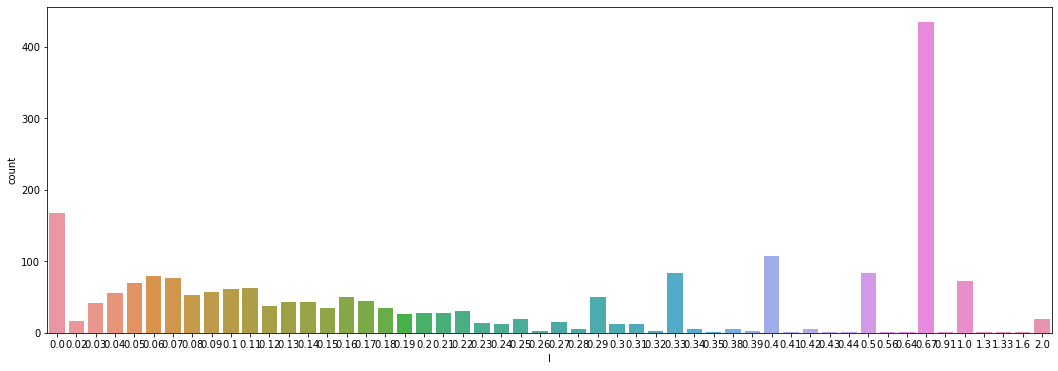

In [13]:
plt.figure(figsize=(18, 6))
sns.countplot(x='l',data=df)

<AxesSubplot:xlabel='d', ylabel='count'>

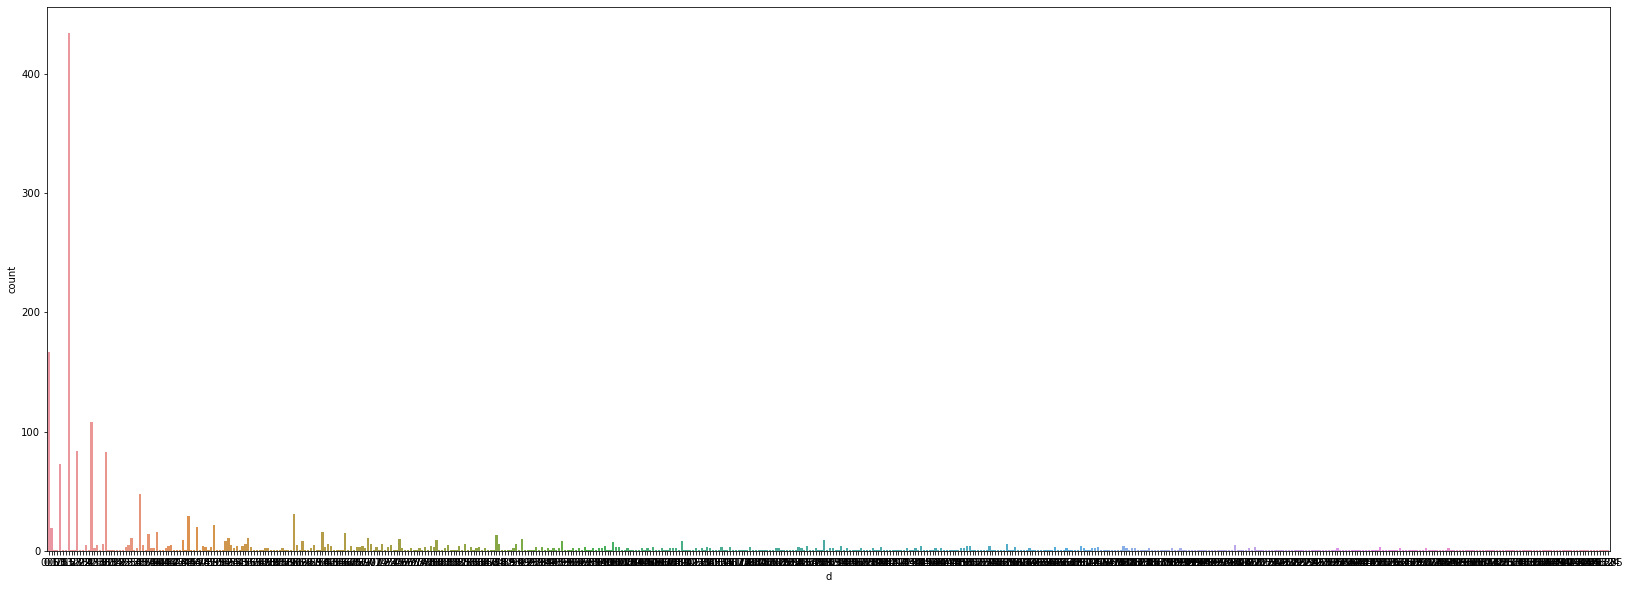

In [14]:
plt.figure(figsize=(28, 10))
sns.countplot(x='d',data=df)

<AxesSubplot:xlabel='i', ylabel='count'>

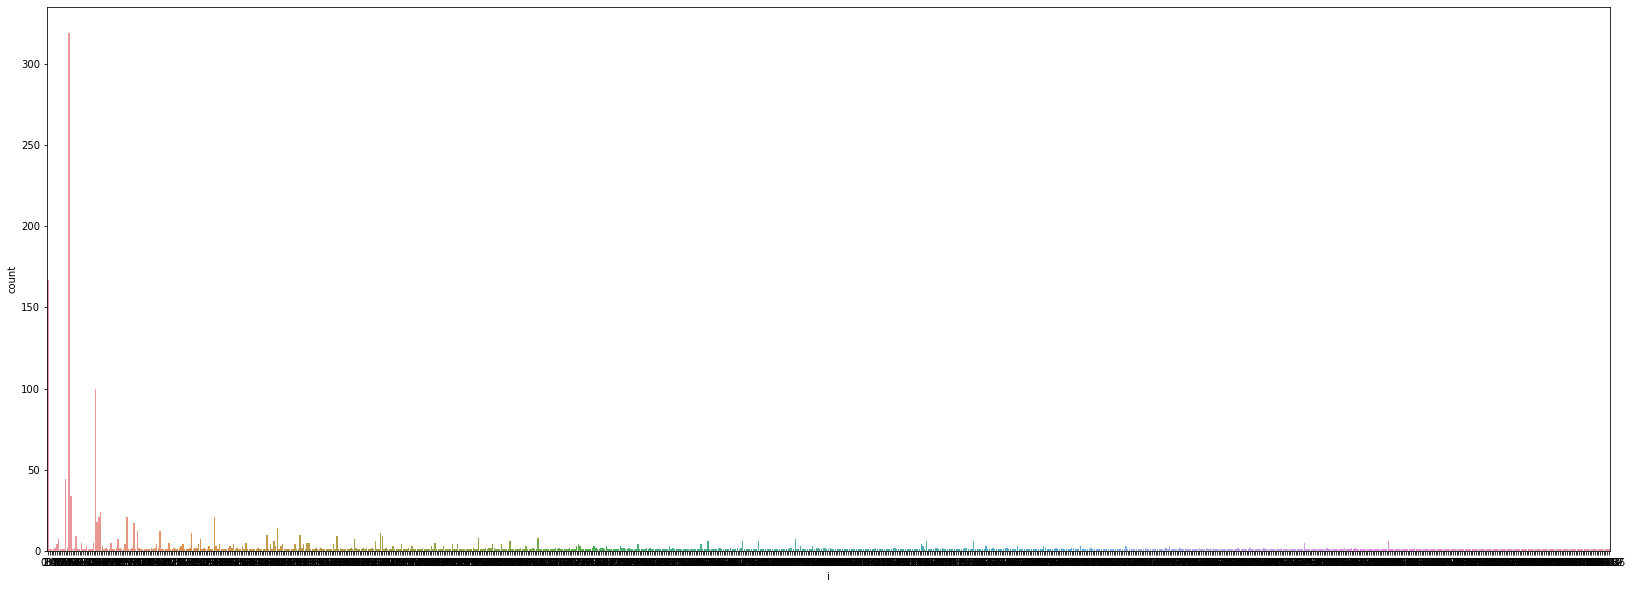

In [15]:
plt.figure(figsize=(28, 10))
sns.countplot(x='i',data=df)

<AxesSubplot:xlabel='e', ylabel='count'>

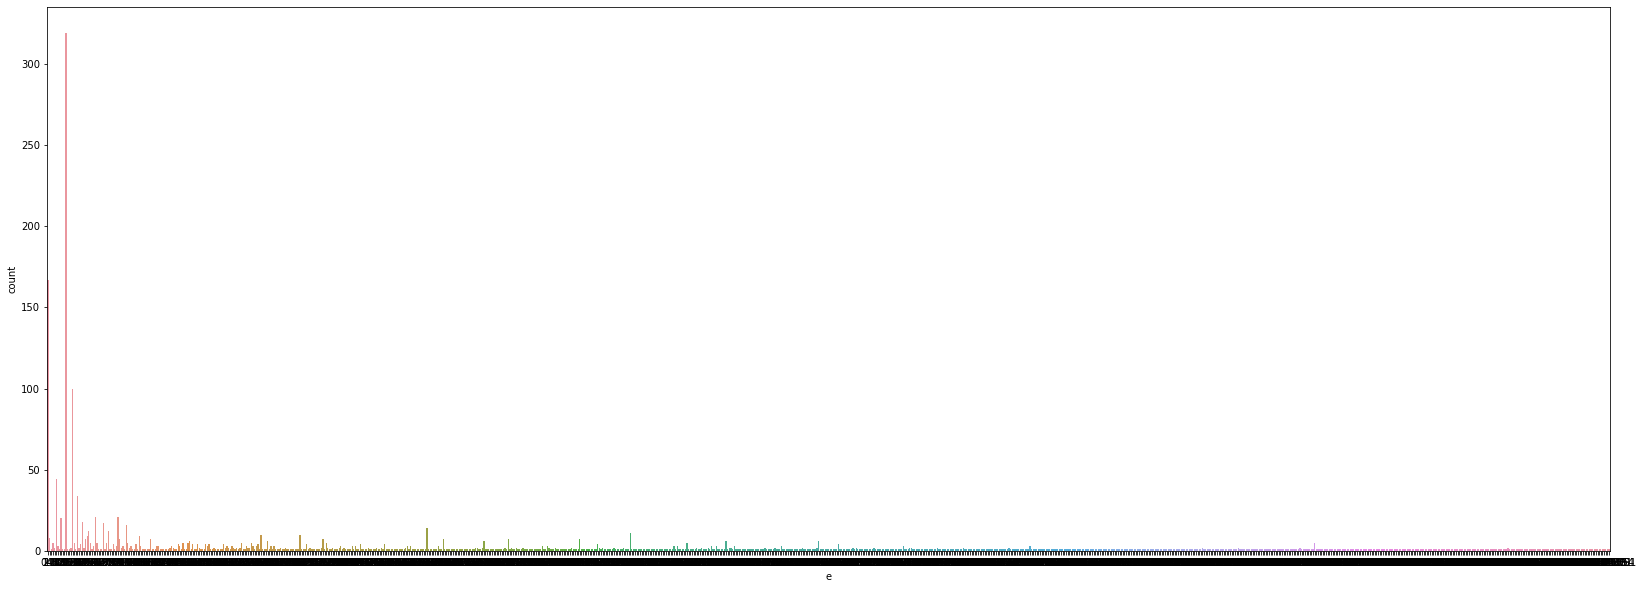

In [16]:
plt.figure(figsize=(28, 10))
sns.countplot(x='e',data=df)

<AxesSubplot:xlabel='lOCode', ylabel='count'>

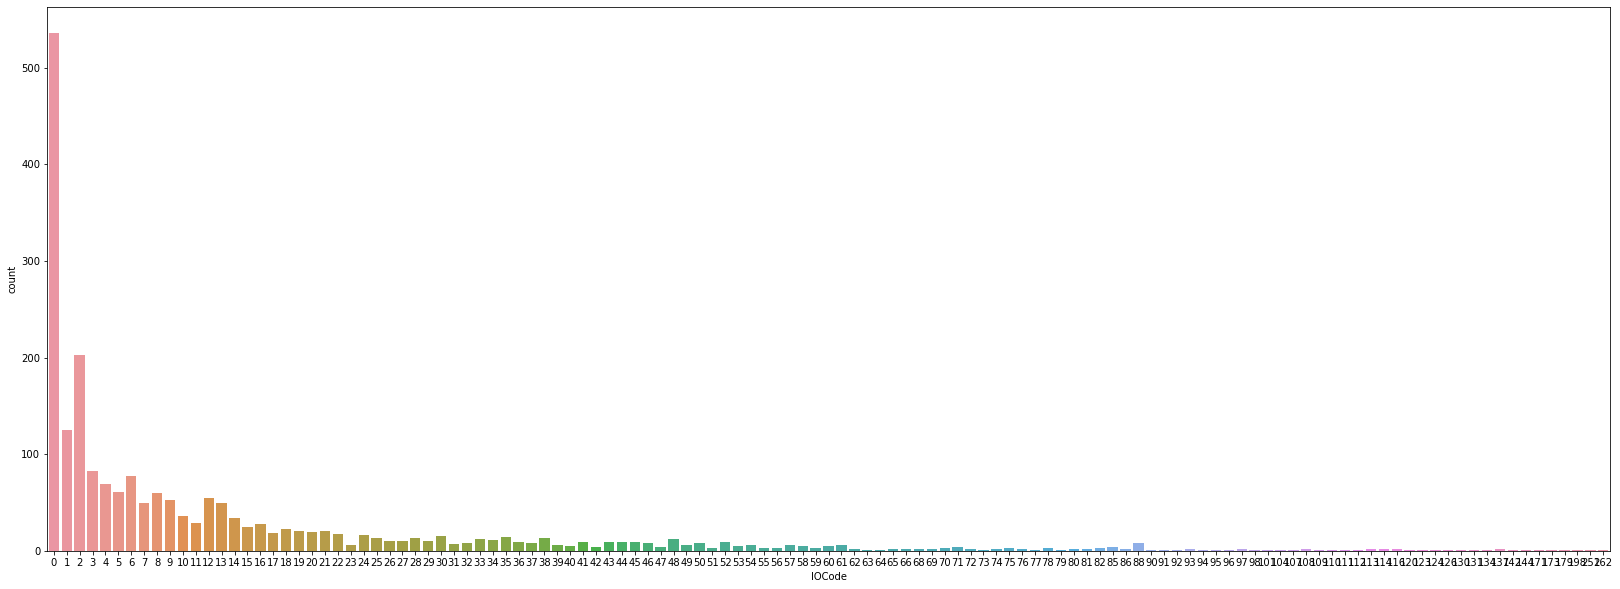

In [17]:
plt.figure(figsize=(28, 10))
sns.countplot(x='lOCode',data=df)

<AxesSubplot:xlabel='lOComment', ylabel='count'>

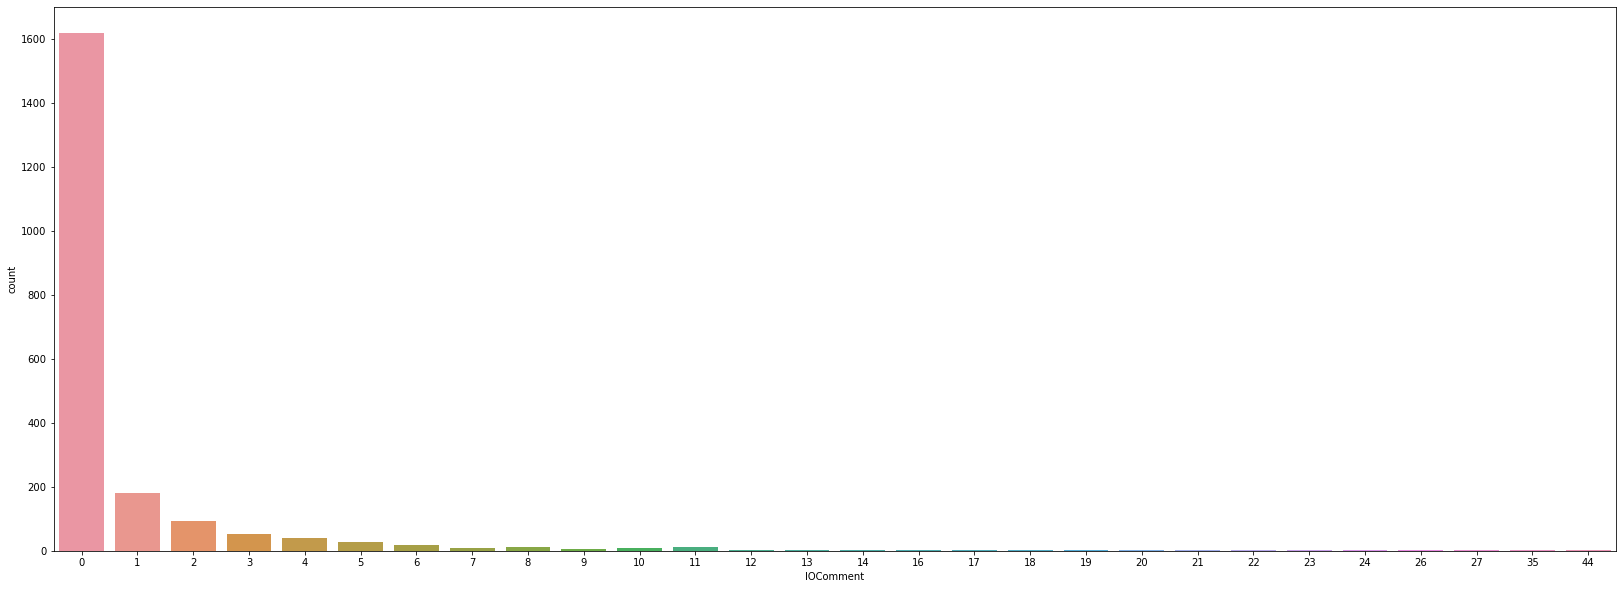

In [18]:
plt.figure(figsize=(28, 10))
sns.countplot(x='lOComment',data=df)

<AxesSubplot:xlabel='lOBlank', ylabel='count'>

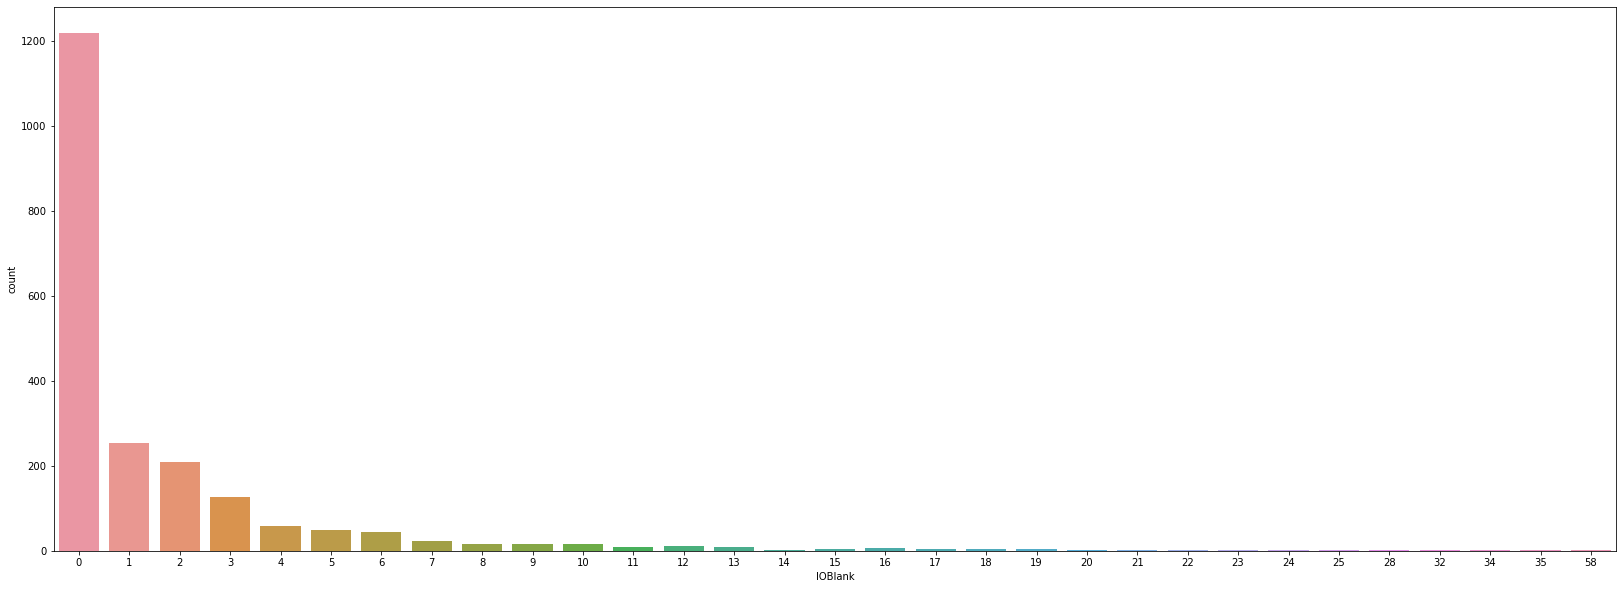

In [19]:
plt.figure(figsize=(28, 10))
sns.countplot(x='lOBlank',data=df)

<AxesSubplot:xlabel='lOCodeAndComment', ylabel='count'>

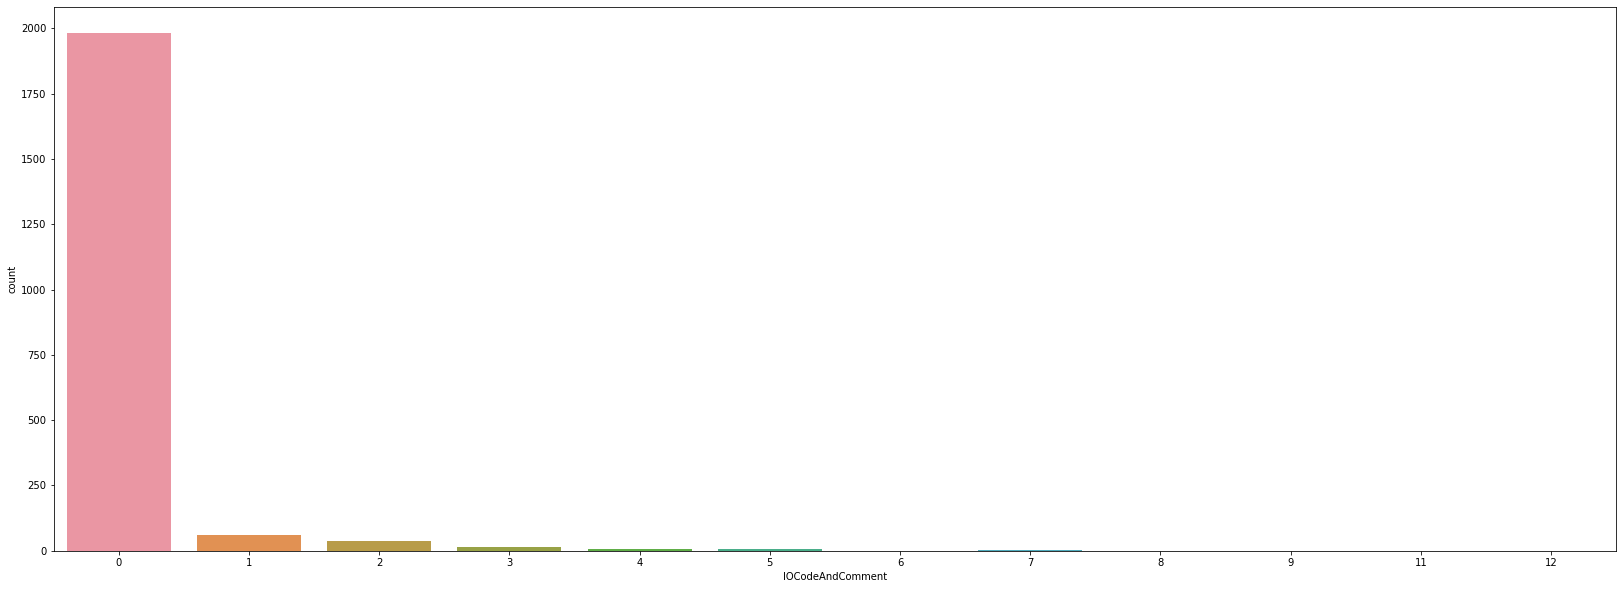

In [20]:
plt.figure(figsize=(28, 10))
sns.countplot(x='lOCodeAndComment',data=df)

<AxesSubplot:xlabel='uniq_Op', ylabel='count'>

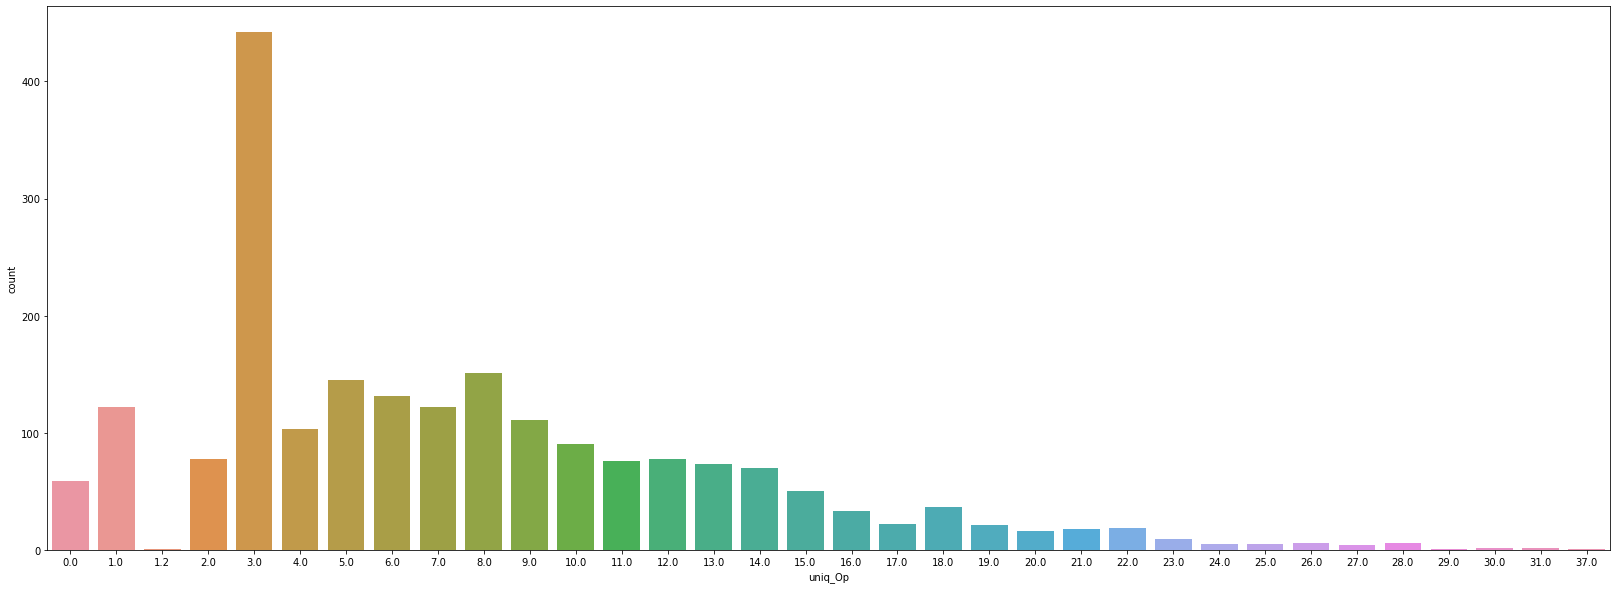

In [21]:
plt.figure(figsize=(28, 10))
sns.countplot(x='uniq_Op',data=df)

<AxesSubplot:xlabel='uniq_Op', ylabel='count'>

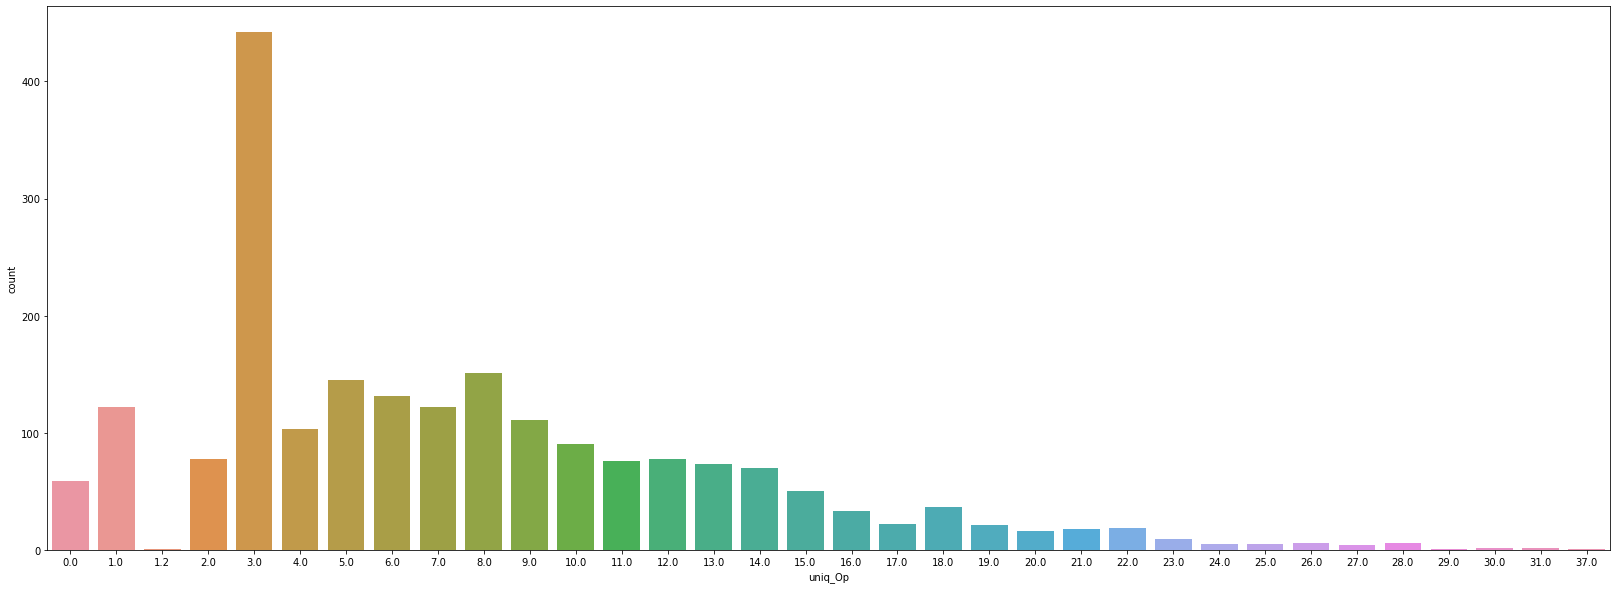

In [22]:
plt.figure(figsize=(28, 10))
sns.countplot(x='uniq_Op',data=df)

<AxesSubplot:xlabel='uniq_Opnd', ylabel='count'>

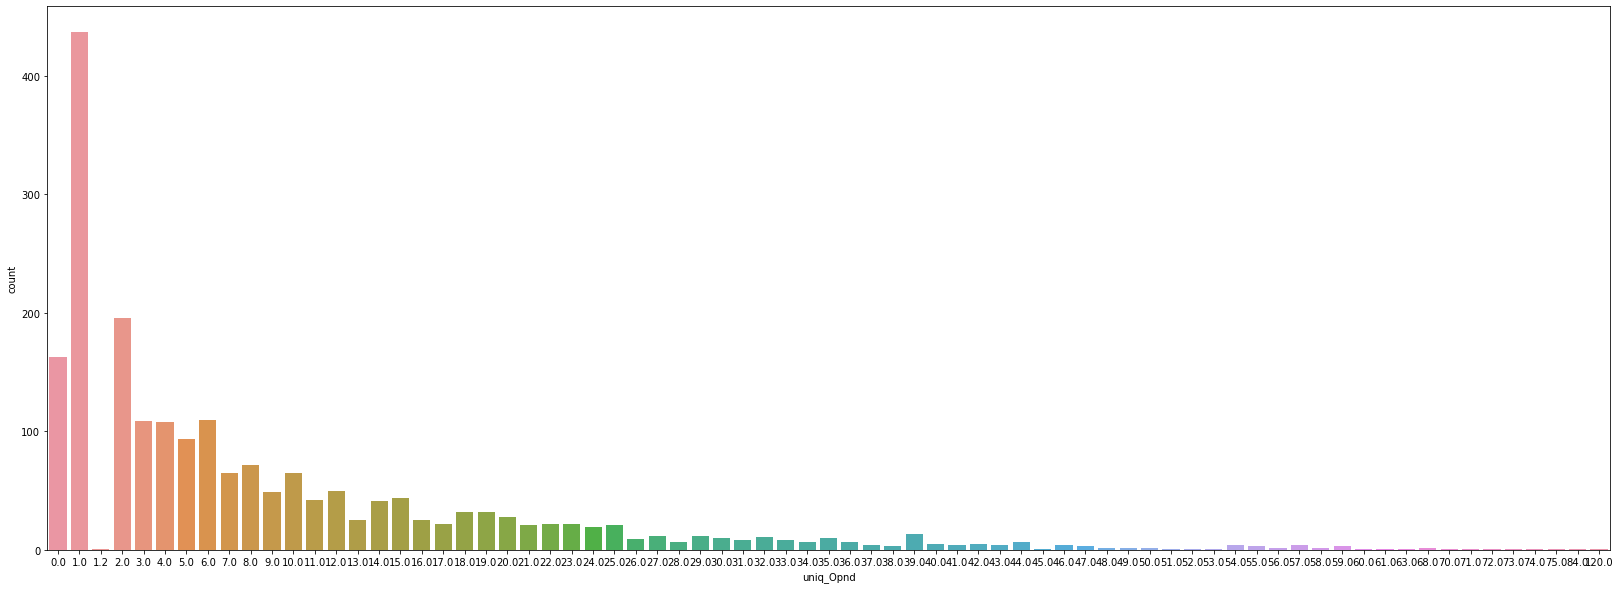

In [23]:
plt.figure(figsize=(28, 10))
sns.countplot(x='uniq_Opnd',data=df)

<AxesSubplot:xlabel='total_Op', ylabel='count'>

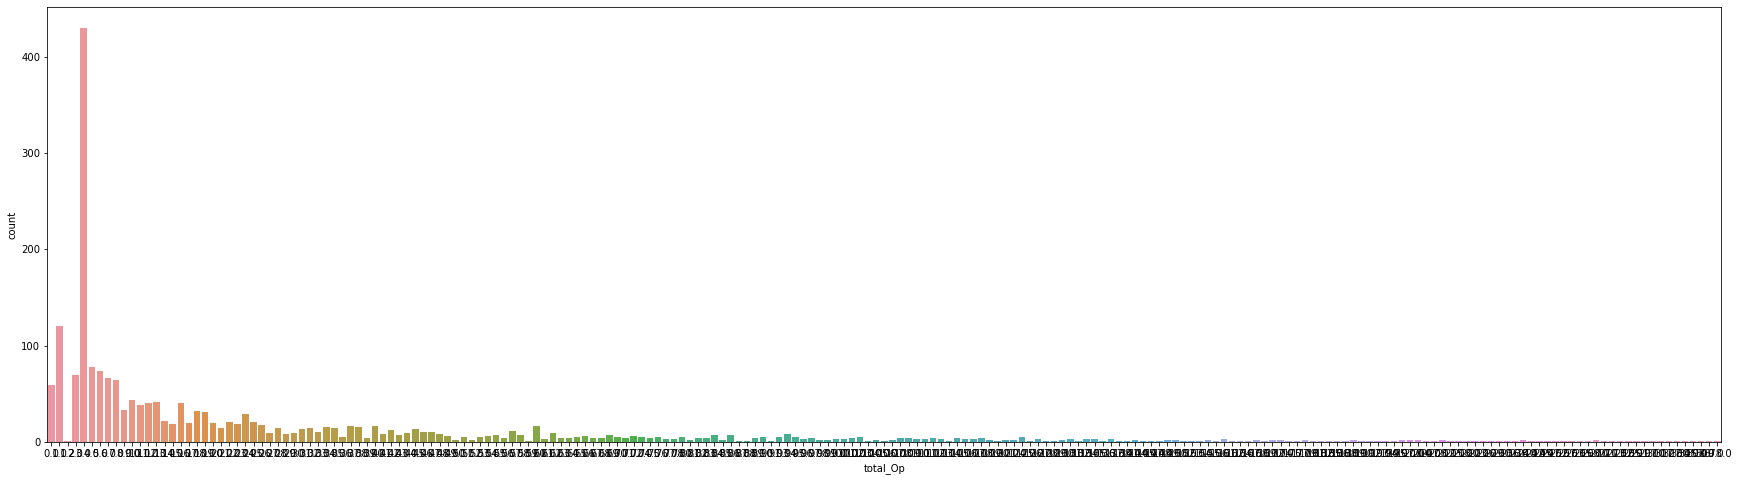

In [24]:
plt.figure(figsize=(30, 8))
sns.countplot(x='total_Op',data=df)

<AxesSubplot:xlabel='total_Opnd', ylabel='count'>

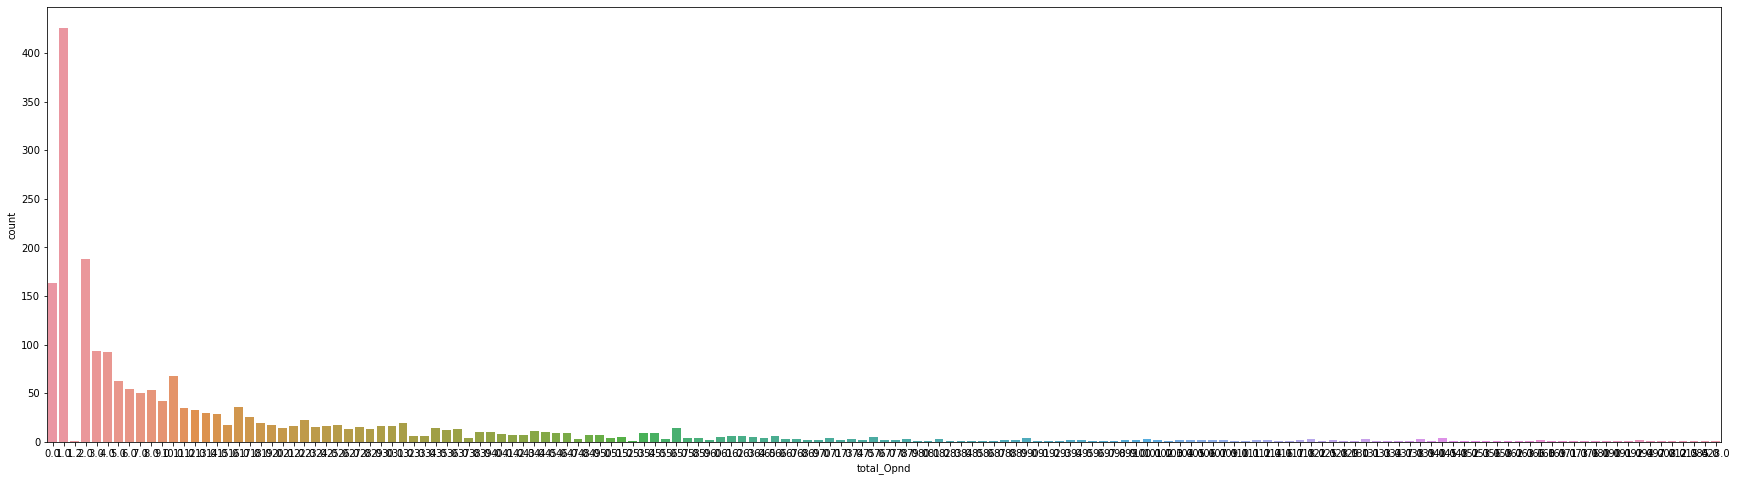

In [25]:
plt.figure(figsize=(30, 8))
sns.countplot(x='total_Opnd',data=df)

<AxesSubplot:xlabel='branchCount', ylabel='count'>

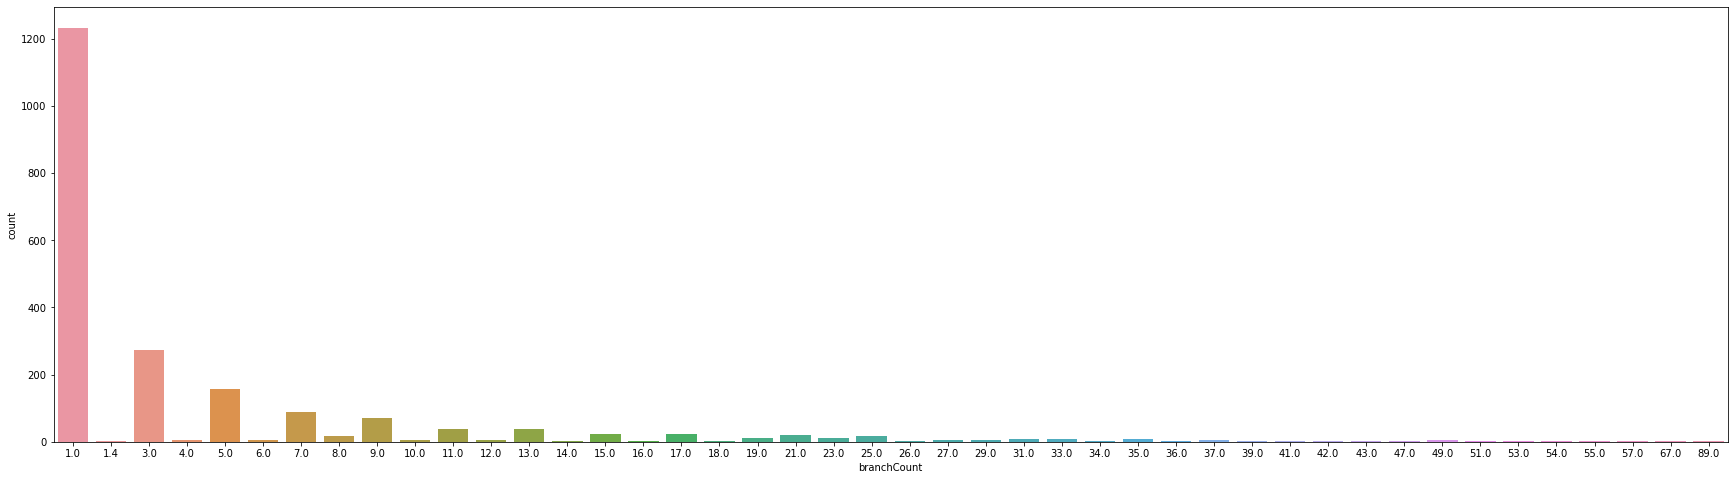

In [26]:
plt.figure(figsize=(30, 8))
sns.countplot(x='branchCount',data=df)

Separate features and Target variable

In [27]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

Scale the features

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Split data into training and testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Defining the Model Architecture

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(21, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(13,activation='relu',input_shape=(14,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

Compiling the model

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the model

In [32]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
47/47 [==============================] - 2s 11ms/step - loss: 0.5172 - accuracy: 0.8415 - val_loss: 0.4399 - val_accuracy: 0.8373
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8550 - val_loss: 0.3847 - val_accuracy: 0.8341
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.3448 - accuracy: 0.8570 - val_loss: 0.3817 - val_accuracy: 0.8404
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8631 - val_loss: 0.3789 - val_accuracy: 0.8452
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8672 - val_loss: 0.3820 - val_accuracy: 0.8468
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8665 - val_loss: 0.3770 - val_accuracy: 0.8420
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8699 - val_loss: 0.3805 - val_accuracy: 0.8483
Epoch 8/50
47/47 [=

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Evaluate model on test set
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0) # Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute precision, recall, and F1 score
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


20/20 [==============================] - 1s 2ms/step
Confusion Matrix:
[[515  18]
 [ 83  17]]
Precision: 0.486
Recall: 0.170
F1 Score: 0.252


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.86      0.97      0.91       533
        True       0.49      0.17      0.25       100

    accuracy                           0.84       633
   macro avg       0.67      0.57      0.58       633
weighted avg       0.80      0.84      0.81       633



Plotting the ROC curve and finding the AUC score

AUC Score: 0.5681144465290806


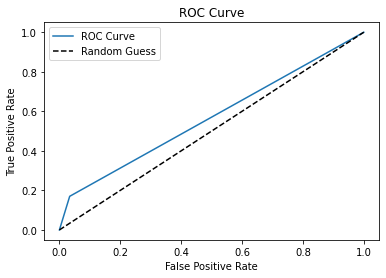

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print('AUC Score:', auc_score)